In [ ]:
from google.colab import drive
drive.flush_and_unmount()


In [ ]:
!pip install -q tensorflow

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import os
import shutil
from google.colab import drive

drive.mount('/content/drive')

drive_dataset_path = '/content/drive/MyDrive/DATASET/unzip/Structured'
local_dataset_path = '/content/Structured'

if not os.path.exists(local_dataset_path):
    shutil.copytree(drive_dataset_path, local_dataset_path)

train_path = os.path.join(local_dataset_path, 'train')
test_path = os.path.join(local_dataset_path, 'test')

image_size = 224
batch_size = 32

train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

test_data = ImageDataGenerator(rescale=1./255)

train_loader = train_data.flow_from_directory(
    train_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_loader = test_data.flow_from_directory(
    test_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
base_model.trainable = True

features = base_model.output
features = GlobalAveragePooling2D()(features)
features = Dropout(0.5)(features)
features = Dense(128, activation='relu')(features)
features = Dropout(0.3)(features)
output_layer = Dense(train_loader.num_classes, activation='softmax')(features)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_adjust = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

history = model.fit(
    train_loader,
    validation_data=test_loader,
    epochs=50,
    callbacks=[early_stop, lr_adjust]
)

model.save('/content/efficientnetb0_har_model.h5')


KeyboardInterrupt: 

In [ ]:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import os
import shutil
from google.colab import drive

drive.mount('/content/drive')

drive_dataset_path = '/content/drive/MyDrive/DATASET/unzip/Structured'
local_dataset_path = '/content/Structured'

if not os.path.exists(local_dataset_path):
    shutil.copytree(drive_dataset_path, local_dataset_path)

train_path = os.path.join(local_dataset_path, 'train')
test_path = os.path.join(local_dataset_path, 'test')

image_size = 224
batch_size = 32

train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

test_data = ImageDataGenerator(rescale=1./255)

train_loader = train_data.flow_from_directory(
    train_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_loader = test_data.flow_from_directory(
    test_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
base_model.trainable = True

features = base_model.output
features = GlobalAveragePooling2D()(features)
features = Dropout(0.5)(features)
features = Dense(128, activation='relu')(features)
features = Dropout(0.3)(features)
output_layer = Dense(train_loader.num_classes, activation='softmax')(features)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_adjust = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

history = model.fit(
    train_loader,
    validation_data=test_loader,
    epochs=50,
    callbacks=[early_stop, lr_adjust]
)

model.save('/content/mobilenetv2_har_model.h5')


Mounted at /content/drive
Found 9180 images belonging to 14 classes.
Found 1764 images belonging to 14 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 223s 588ms/step - accuracy: 0.2416 - loss: 2.4325 - val_accuracy: 0.5136 - val_loss: 1.8814 - learning_rate: 1.0000e-04
Epoch 2/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 139s 484ms/step - accuracy: 0.6017 - loss: 1.2597 - val_accuracy: 0.5811 - val_loss: 1.9515 - learning_rate: 1.0000e-04
Epoch 3/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 144s 501ms/step - accuracy: 0.7002 - loss: 0.9434 - val_accuracy: 0.6378 - val_loss: 1.7133 - learning_rate: 1.0000e-04
Epoch 4/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 145s 504ms/step - accuracy: 0.7541 - loss: 0.7641 - val_accuracy: 0.6854 - val_loss: 1.5293 - learning_rate: 1.0000e-04
Epoch 5/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 142s 495ms/step - accuracy: 0.7956 - loss: 0.6719 - val_accuracy: 0.6786 - val_loss: 1.5185 - learning_rate: 1.0000e-04
Epoch 6/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 140s 487ms/step - accuracy: 0.8062 - loss: 0.6045 - val_accuracy: 0.6701 - val_loss: 1.5694 - learning_rate: 1.0000e-04
Epoch 7/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 

/content/EchoVision


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
remote: Permission to ianmolbisht/EchoVision.git denied to ianmolbisht.
fatal: unable to access 'https://github.com/ianmolbisht/EchoVision.git/': The requested URL returned error: 403


In [ ]:
#MobileNet
model.save('/content/drive/MyDrive/mobilenetv2_har_model.h5')

In [ ]:
#EffNet B0
model.save('/content/drive/MyDrive/efficientnetb0_har_model.h5')

In [ ]:
# Mobnetv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32
test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/drive/MyDrive/DATASET/unzip/Structured/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Evaluate
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Found 1764 images belonging to 14 classes.
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.8154 - loss: 0.6904
Test Accuracy: 74.43%
Test Loss: 1.3400


In [ ]:
# effnet B0
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8158 - loss: 0.6812
Test Accuracy: 76.25%
Test Loss: 1.2110


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


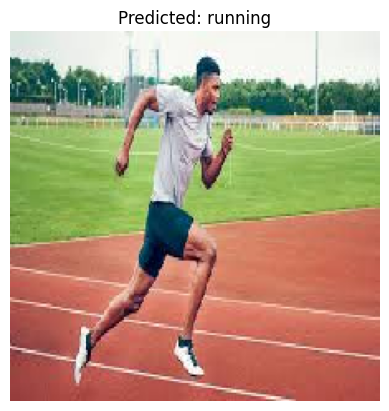

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Path to a custom test image
img_path = '/content/drive/MyDrive/DATASET/run.jpg'  # change to your test image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # same normalization as training

# Predict
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[predicted_class_index]

# Display
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


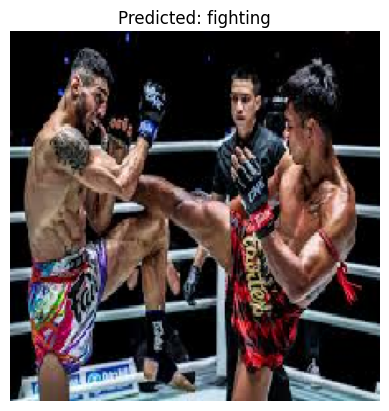

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Path to a custom test image
img_path = '/content/drive/MyDrive/DATASET/fight.jpg'  # change to your test image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # same normalization as training

# Predict
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[predicted_class_index]

# Display
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


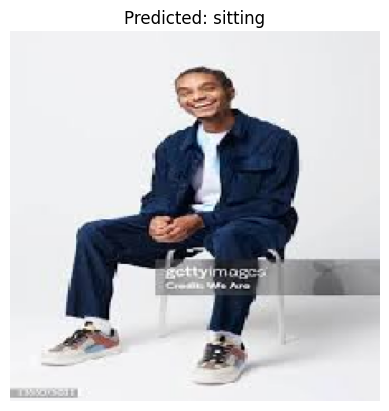

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Path to a custom test image
img_path = '/content/drive/MyDrive/DATASET/sit.jpg'  # change to your test image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # same normalization as training

# Predict
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[predicted_class_index]

# Display
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1764 images belonging to 14 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step

Classification Report:

                    precision    recall  f1-score   support

           calling       0.70      0.77      0.73       126
          clapping       0.84      0.73      0.78       126
           cycling       0.96      0.98      0.97       126
           dancing       0.84      0.82      0.83       126
          drinking       0.64      0.87      0.74       126
            eating       0.90      0.92      0.91       126
          fighting       0.83      0.79      0.81       126
           hugging       0.77      0.81      0.79       126
          laughing       0.73      0.76      0.74       126
listening_to_music       0.52      0.78      0.63       126
           running       0.90      0.77      0.83       126
           sitting       0.67      0.75      0.71       126
          sleeping       0.80      0.91      0.86       126
           texting       0.00      0.00      0.00       126

          accuracy               

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


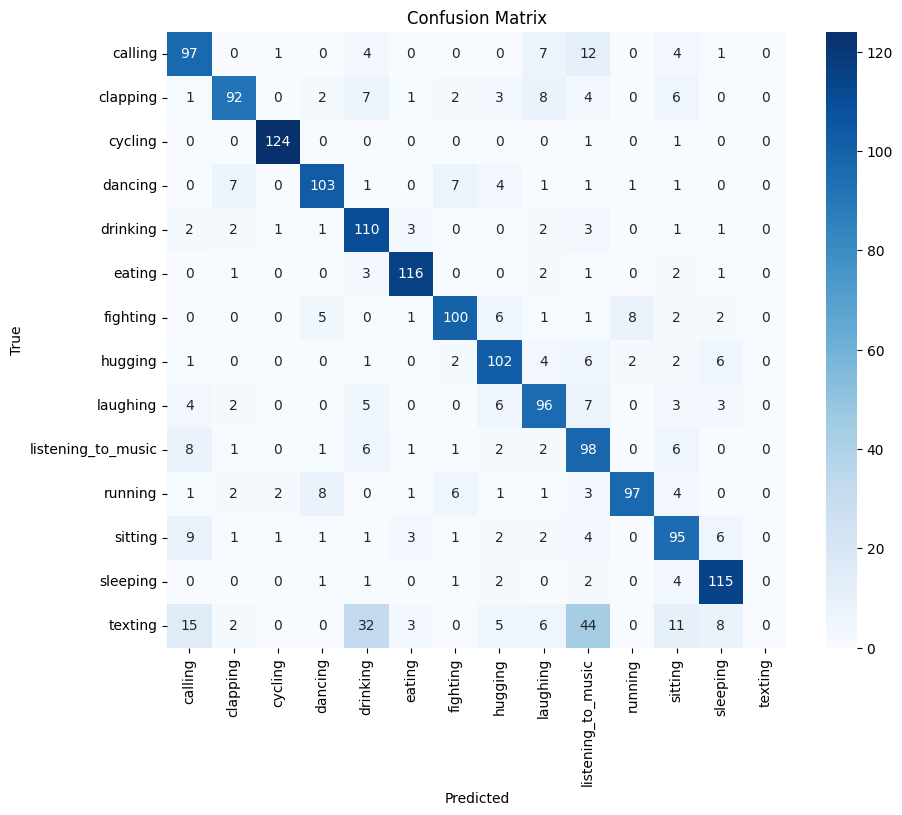

F1 Score (Macro): 0.7380
F1 Score (Micro): 0.7625
F1 Score (Weighted): 0.7380


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Copy dataset from Google Drive to local Colab path (only if not already copied)
import os, shutil

drive_dataset_path = '/content/drive/MyDrive/DATASET/unzip/Structured'
local_dataset_path = '/content/Structured'

if not os.path.exists(local_dataset_path):
    shutil.copytree(drive_dataset_path, local_dataset_path)

# Define test path and data loader
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
batch_size = 32
test_path = os.path.join(local_dataset_path, 'test')

test_data = ImageDataGenerator(rescale=1./255)
test_loader = test_data.flow_from_directory(
    test_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the saved model
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/efficientnetb0_har_model.h5')

# Predict on test data
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

pred_probs = model.predict(test_loader)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_loader.classes
class_labels = list(test_loader.class_indices.keys())

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# F1 Scores
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_micro = f1_score(y_true, y_pred, average='micro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f"F1 Score (Macro): {f1_macro:.4f}")
print(f"F1 Score (Micro): {f1_micro:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")


In [ ]:
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load pretrained YOLOv8n (or s/m/l depending on GPU power)
yolo_model = YOLO('yolov8n.pt')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 74.0MB/s]


In [ ]:
results = yolo_model(frame)
for box in results[0].boxes:
    cls_id = int(box.cls)
    class_name = results[0].names[cls_id]
    print(f"Detected object: {class_name}")


NameError: name 'frame' is not defined